<h1>Tidy Tuesdays 1: Novel Corona Virus 2019 Dataset</h1>

In [ ]:
import  pandas as pd
import  numpy as np

# Data visualization
import  seaborn as sns
import  matplotlib as plt
%matplotlib inline

<h2>Data preparation</h2>

Let's take a look at the data:

In [43]:
data = pd.read_csv('covid_19_data.csv')

data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


Here is the count of missing values for each column in the dataset: 

In [44]:
data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     62045
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

Since only the Province/State column has empty data, let's just ignore this column by deleting it.

In [45]:
data= data.drop(['Province/State'], axis=1)

In [46]:
data.isnull().sum()

SNo                0
ObservationDate    0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

<br>Let's check if there are duplicate records

In [47]:
duplicate = data[data.duplicated()] #overall 
duplicate

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered


In [48]:
duplicate = data[data.duplicated('SNo')] #based on serial number
duplicate

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered


As we can see, no record has been duplicated!

Now that we are done with the preparation of data, we can now proceed to data analysis.

<h2>Data Analysis</h2>

<h3>Confirmed Cases Overtime</h3>

Let's take a look at the total number of countries affected by COVID-19


In [49]:
countries = data['Country/Region'].unique()
print('The total number of countries affected by the virus is: %s \n' % len(countries))

print(countries)

The total number of countries affected by the virus is: 227 

['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary'

Wow that's a lot! Why don't we further group the cases around the world so we can analyze them more?

In [98]:
# Convert ObservationDate to datetime object
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], format='%m/%d/%Y', utc=True);

In [99]:
#group by date
groupdate=data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

<h4>Total number of Confirmed Cases</h4>

In [100]:
# get total number of confirmed cases
print('Total number of Confirmed cases around the world: %s' % groupdate["Confirmed"].iloc[-1])

Total number of Confirmed cases around the world: 113784735.0


Let's take a look at the visual representation of the confirmed cases:

Text(0.5, 1.0, 'Confirmed Cases')

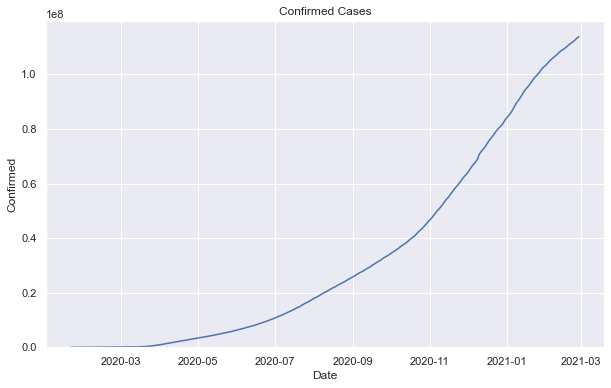

In [106]:
fig = sns.lineplot(data=groupdate["Confirmed"], x=groupdate.index, y=groupdate["Confirmed"])
sns.set(rc={'figure.figsize':(10,6)})
fig.set_ylabel("Confirmed")
fig.set_xlabel("Date")
fig.set_ylim(ymin=0)
fig.set_title("Confirmed Cases")

As we can see on the graph, the rate of change (slope) of the graph is still high despite the virus being around for a year already. This could mean that there are still lots of countries that cannot control the spread of the virus.

<h4>Total number of Active Cases</h4>

In [104]:
# get total number of active cases
groupdate["Active"] = groupdate["Confirmed"]-groupdate["Recovered"]-groupdate["Deaths"]
print('Total number of Active cases around the world: %s' % groupdate["Active"].iloc[-1])

Total number of Active cases around the world: 47016049.0


Text(0.5, 1.0, 'Active Cases')

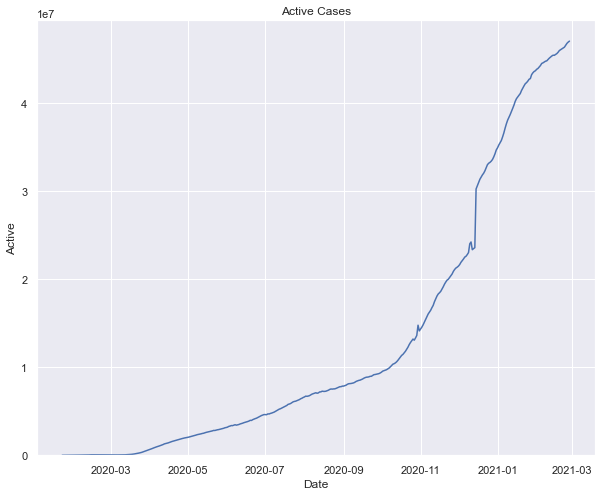

In [103]:
fig = sns.lineplot(data=groupdate["Active"], x=groupdate.index, y=groupdate["Active"])
sns.set(rc={'figure.figsize':(10,8)})
fig.set_ylabel("Active")
fig.set_xlabel("Date")
fig.set_ylim(ymin=0)
fig.set_title("Active Cases")

From the graph above, we could see that the highest rate of change was from November 2020 to January 2021. This could be brough by the holiday season

In [ ]:
# get total number of recovered cases
print('Total number of Recovered cases around the world: %s' % groupdate["Recovered"].iloc[-1])

# get total number of deaths
print('Total number of Death cases around the world: %s' % groupdate["Deaths"].iloc[-1])